In [177]:
import os
import pandas as pd
import tifffile as tff
import openpyxl
import xlsxwriter
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import math
import scikit_posthocs as sp

In [2]:
# directory containing excel file with morphometric output from FIJI 3D Suite
dir_3D_suite = "C:/Users/Mary/Documents/Shared folder/Data/SXT/ML segmentation tiffs/Morphometric analysis/New 3D Suite analysis/3D Suite Measurements/"
data_dir = dir_3D_suite + "by strain/scaled sorted filtered/"
vol_rat_dir = dir_3D_suite + "Volumes and ratios/"


In [57]:
# import data tables

all_cell = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='Cell')
all_vac = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
all_nuc = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
all_ld = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='LD')

wt_cell = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='Cell')
wt_vac = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
wt_nuc = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
wt_ld = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='LD')

vph1_cell = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='Cell')
vph1_vac = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
vph1_nuc = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
vph1_ld = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='LD')

vac14_cell = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='Cell')
vac14_vac = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
vac14_nuc = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
vac14_ld = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='LD')


In [72]:
# wt_nuc = wt_nuc.drop([287,288,289,290])
wt_nuc

,index,Cell ID,Object ID,Volume(Pix),Volume (um^3),Volume (um^3)_ManCalc,CX(pix),CY(pix),CZ(pix),CX (um),...,Compactness(Pix),CompactCorr(Pix),Sphericity(Unit),Sphericity(Pix),SpherCorr(Pix),EllSpareness,EllElon,EllFlatness,Unnamed: 40,Unnamed: 41
0,0.0,BY471A_1026_1_10_pre_rec_0_multi_bin_NUC,BY471A_1026_1_10_pre_rec_0_multi_bin_NUC.tiff_1,42266.0,1.26798,1.141182,48.897,53.781,56.966,1.46691,...,0.293,1.001,0.664,0.664,1.000,0.993,1.098,1.085,NaN,NaN
1,1.0,BY471A_1026_1_10_pre_rec_10_multi_bin_NUC,BY471A_1026_1_10_pre_rec_10_multi_bin_NUC.tiff_1,50832.0,1.52496,1.372464,61.510,86.208,56.274,1.84530,...,0.285,0.992,0.658,0.658,0.997,0.995,1.145,1.101,NaN,NaN
2,2.0,BY471A_1026_1_10_pre_rec_13_multi_bin_NUC,BY471A_1026_1_10_pre_rec_13_multi_bin_NUC.tiff_1,23958.0,0.71874,0.646866,91.872,53.650,98.168,2.75616,...,0.207,0.708,0.591,0.591,0.891,0.948,1.197,1.398,NaN,NaN
3,3.0,BY471A_1026_1_10_pre_rec_15_multi_bin_NUC,BY471A_1026_1_10_pre_rec_15_multi_bin_NUC.tiff_1,34862.0,1.04586,0.941274,72.923,77.462,76.164,2.18769,...,0.265,0.929,0.642,0.642,0.976,0.988,1.284,1.171,NaN,NaN
4,4.0,BY471A_1026_1_10_pre_rec_19_multi_bin_NUC,BY471A_1026_1_10_pre_rec_19_multi_bin_NUC.tiff_1,51073.0,1.53219,1.378971,54.114,56.211,78.680,1.62342,...,0.287,0.988,0.660,0.660,0.996,0.992,1.096,1.119,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,357.0,BY471_wt_1359_2_pre_rec_26_multi_bin_NUC,BY471_wt_1359_2_pre_rec_26_multi_bin_NUC.tiff_1,67059.0,2.01177,1.810593,100.011,109.847,90.553,3.00033,...,0.235,0.845,0.617,0.617,0.945,0.972,1.351,1.368,NaN,NaN
283,358.0,BY471_wt_1359_2_pre_rec_38_multi_bin_NUC,BY471_wt_1359_2_pre_rec_38_multi_bin_NUC.tiff_1,28586.0,0.85758,0.771822,105.893,62.026,79.471,3.17679,...,0.266,0.854,0.643,0.643,0.949,0.984,1.172,1.598,NaN,NaN
284,359.0,BY471_wt_1359_2_pre_rec_41_multi_bin_NUC,BY471_wt_1359_2_pre_rec_41_multi_bin_NUC.tiff_1,22113.0,0.66339,0.597051,70.181,52.824,55.381,2.10543,...,0.272,0.969,0.648,0.648,0.990,0.984,1.174,1.098,NaN,NaN
285,360.0,BY471_wt_1359_2_pre_rec_42_multi_bin_NUC,BY471_wt_1359_2_pre_rec_42_multi_bin_NUC.tiff_1,52107.0,1.56321,1.406889,59.556,68.785,45.226,1.78668,...,0.282,0.952,0.655,0.655,0.984,0.990,1.137,1.202,NaN,NaN


### Fig. 4A-D ###

Text(0.5, 1.0, 'LD')

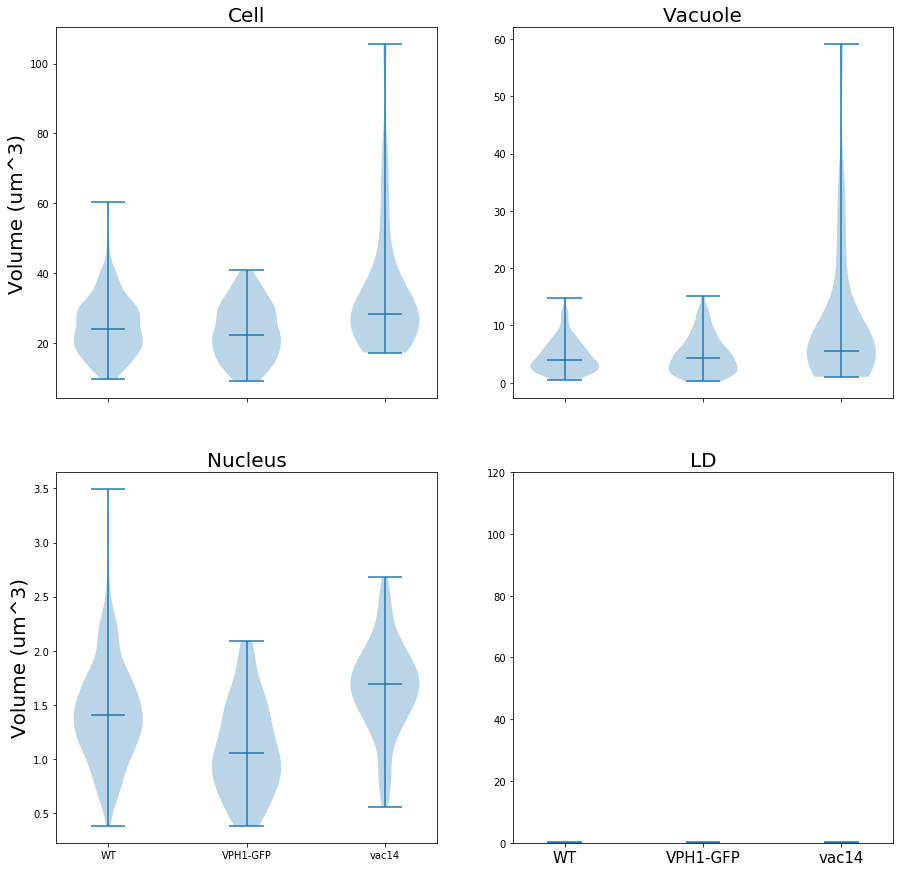

In [278]:
# organelle volume strain-comparison plots
# "ManCalc" refers to manually calculated volumes (# voxels * known voxel size) to validate against automatically calculated volumes 
# output by FIJI #

vols_list = [wt_cell['Volume (um^3)_ManCalc'],vph1_cell['Volume (um^3)_ManCalc'],vac14_cell['Volume (um^3)_ManCalc'], 
             wt_vac['Volume (um^3)_ManCalc'],vph1_vac['Volume (um^3)_ManCalc'],vac14_vac['Volume (um^3)_ManCalc'],
             wt_nuc['Volume (um^3)_ManCalc'],vph1_nuc['Volume (um^3)_ManCalc'],vac14_nuc['Volume (um^3)_ManCalc'],
             wt_ld['Volume (um^3)_ManCalc'],vph1_ld['Volume (um^3)_ManCalc'],vac14_ld['Volume (um^3)_ManCalc']]

fig,axs = plt.subplots(2,2,squeeze=False,sharex=True,figsize=(15,15))
strains = ['WT','VPH1-GFP','vac14']
plt.xticks(ticks=[1,2,3],labels=strains,fontsize=15)

axs[0,0].violinplot(vols_list[0:3],showmedians=True)
axs[0,0].set_title('Cell',fontsize=20)
axs[0,0].set_ylabel('Volume (um^3)',fontsize=20)

axs[0,1].violinplot(vols_list[3:6],showmedians=True)
axs[0,1].set_title('Vacuole',fontsize=20)

axs[1,0].violinplot(vols_list[6:9],showmedians=True)
axs[1,0].set_title('Nucleus',fontsize=20)
axs[1,0].set_ylabel('Volume (um^3)',fontsize=20)

axs[1,1].violinplot(vols_list[9:12],showmedians=True)
axs[1,1].set_title('LD',fontsize=20)

# fix the spacing, size, color/line thickness?
# statistical comparisons?


# output_dir = 'C:/Users/Mary/Documents/Shared folder/Data/SXT/Technical paper/Figures/'
# output_dir = 'C:/Users/Mary/Documents/Shared folder/Data/SXT/ML segmentation tiffs/Morphometric analysis/New 3D Suite analysis/3D Suite Measurements/Figures/Figures for SXT Tech paper/'

# plt.savefig(output_dir +'volume violins.jpg')

In [106]:
# Supplementary table 1. Summary Stats - 5/23/24

stats_table = pd.DataFrame(vols_list)
stats_table = stats_table.T
# stats_table['WT Cell Volume'] = wt_cell['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP Cell Volume'] = vph1_cell['Volume (um^3)_ManCalc']
# stats_table['vac14 Cell Volume'] = vac14_cell['Volume (um^3)_ManCalc']
# stats_table['WT Vacuole Volume'] = wt_vac['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP Vacuole Volume'] = vph1_vac['Volume (um^3)_ManCalc']
# stats_table['vac14 Vacuole Volume'] = vac14_vac['Volume (um^3)_ManCalc']
# stats_table['WT Nucleus Volume'] = wt_nuc['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP Nucleus Volume'] = vph1_nuc['Volume (um^3)_ManCalc']
# stats_table['vac14 Nucleus Volume'] = vac14_nuc['Volume (um^3)_ManCalc']
# stats_table['WT LD Volume'] = wt_ld['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP LD Volume'] = vph1_ld['Volume (um^3)_ManCalc']
# stats_table['vac14 LD Volume'] = vac14_ld['Volume (um^3)_ManCalc']

stats_table



,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc
0,18.262341,18.557964,42.678974,2.101950,2.736234,17.901004,1.141182,0.908550,1.573564,0.012096,0.001674,0.027156
1,20.149290,13.819896,26.822167,3.305610,1.473228,6.356608,1.372464,0.813213,1.909466,0.013095,0.000135,0.014476
2,26.547480,16.835175,26.069448,6.702966,1.795554,5.983549,0.646866,1.180332,1.561713,0.011853,0.017145,0.019145
3,13.132179,31.422816,22.325244,1.971162,8.993322,1.046050,0.941274,1.066878,1.556436,0.015903,0.002079,0.017515
4,20.004732,10.183158,34.051362,2.593593,1.209006,5.059937,1.378971,0.478737,2.440046,0.028431,0.037152,0.007155
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040905,NaN,NaN
1477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005022,NaN,NaN
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003915,NaN,NaN
1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006318,NaN,NaN


In [179]:
# - 5/23/24
# hypothesis testing - for each dataset, create a list containing normality, homoscedasticity, significance test & post-hoc

# calculate normality
shap_stat = []
shap_pval = []
norm = []

for d in vols_list:
    shapwilk_norm = stats.shapiro(d)
    shap_stat.append(shapwilk_norm[0])
    shap_pval.append(shapwilk_norm[1])
    if shapwilk_norm[1] < 0.05:
        norm.append('nonparametric')
    else:
        norm.append('parametric')

# shap_stat
# shap_pval
norm

['nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'parametric',
 'nonparametric',
 'nonparametric',
 'nonparametric']

In [120]:
# - 5/23/24
sumstats_table = stats_table.describe()
sumstats_table.loc['Shapiro-Wilk statistic'] = shap_stat
sumstats_table.loc['Shapiro-Wilk p-value'] = shap_pval
sumstats_table.loc['Parametricity'] = norm


sumstats_table
Excelwriter = pd.ExcelWriter("Volume summary stats.xlsx", engine = 'xlsxwriter')
sumstats_table.to_excel(Excelwriter, sheet_name = 'Volume', index=False)
Excelwriter.save()

In [182]:
# stats function - - 5/23/24
# input: list of datasets (lists or df columns of numbers)
# output: summary stats table

def calcstats_list(datalist):
    data_df = pd.DataFrame(datalist)
    data_df = data_df.T
    
    # calculate normality
    shap_stat = []
    shap_pval = []
    norm = []

    for d in datalist:
        shapwilk_norm = stats.shapiro(d)
        shap_stat.append(shapwilk_norm[0])
        shap_pval.append(shapwilk_norm[1])
        if shapwilk_norm[1] < 0.05:
            norm.append('nonparametric')
        else:
            norm.append('parametric')

    # shap_stat
    # shap_pval
    # norm
    
    sumstats_table = data_df.describe()
    sumstats_table.loc['Shapiro-Wilk statistic'] = shap_stat
    sumstats_table.loc['Shapiro-Wilk p-value'] = shap_pval
    sumstats_table.loc['Parametricity'] = norm
        
    return sumstats_table

#     Excelwriter = pd.ExcelWriter("Volume summary stats.xlsx", engine = 'xlsxwriter')
#     sumstats_table.to_excel(Excelwriter, sheet_name = 'Volume', index=False)
#     Excelwriter.save()

In [183]:
#  5/23/24
calcstats(vols_list)

,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc
count,287,138,65,287,138,65,287,138,65,1481,709,367
mean,24.8478,23.2806,34.4011,4.63173,4.90043,10.3368,1.43459,1.09654,1.65861,0.0175796,0.0108201,0.0173226
std,8.5542,8.08939,18.5027,2.89199,3.41576,12.2125,0.47744,0.428942,0.424892,0.0161639,0.0119028,0.0157521
min,9.57037,9.05985,17.2631,0.467856,0.280503,1.04605,0.379971,0.3807,0.559698,2.7e-05,2.7e-05,2.76258e-05
25%,18.4914,16.622,23.224,2.37978,2.0477,3.97516,1.12106,0.77708,1.42753,0.005454,0.003051,0.00705839
50%,23.9301,22.381,28.2169,3.91746,4.3139,5.49728,1.40689,1.05087,1.68838,0.014256,0.007722,0.0132327
75%,29.8636,29.5151,36.1393,6.24721,6.653,9.32353,1.69553,1.40398,1.90947,0.0245216,0.013932,0.0231366
max,60.2846,40.779,105.532,14.875,15.198,59.0821,3.49518,2.09023,2.68053,0.117457,0.1053,0.0978781
Shapiro-Wilk statistic,0.967061,0.974458,0.711674,0.92728,0.9245,0.668845,0.972449,0.969524,0.974428,0.84805,0.749589,0.827007
Shapiro-Wilk p-value,3.876e-06,0.0107913,5.35697e-10,1.25014e-10,1.04798e-06,7.85588e-11,2.52204e-05,0.00350608,0.196981,1.75337e-35,2.22115e-31,1.43765e-19


In [205]:
# hypothesis testing - WT vs vph1GFP; vph1-GFP vs vac14 - 5/23/24
tests = {'Cell - WT vs vph1-GFP':(vols_list[0],vols_list[1]), 'Cell - vph1-GFP vs vac14':(vols_list[1],vols_list[2]),
             'Vacuole - WT vs vph1-GFP':(vols_list[3],vols_list[4]), 'Vacuole - vph1-GFP vs vac14':(vols_list[4],vols_list[5]),
            'Nucleus - WT vs vph1-GFP':(vols_list[6],vols_list[7]), 'Nucleus - vph1-GFP vs vac14':(vols_list[7],vols_list[8]),
             'LD - WT vs vph1-GFP':(vols_list[9],vols_list[10]), 'LD - vph1-GFP vs vac14':(vols_list[10],vols_list[11])}

def sigtest(test_dict):

    mwu_stat = []
    ht_pval = []
    statsig = []
    testnames = []
    

    for d,v in test_dict.items():
    #     print(stats.levene(v[0],v[1])) #skip because all distributions are non-normal
        mwu = stats.mannwhitneyu(v[0],v[1])
        mwu_stat.append(mwu[0])
        ht_pval.append(mwu[1])
        if mwu[1] < 0.05:
            statsig.append('S')
        else:
            statsig.append('NS')
        testnames.append(d)
    #     print(v)
    
    results_df = pd.DataFrame(columns=test_dict)
    results_df.loc['Mann-Whitney U-test statistic'] = mwu_stat
    results_df.loc['p-value'] = ht_pval
    results_df.loc['Significant (p<0.05)'] = statsig

    return results_df



In [206]:
# - 5/23/24
sigtest(tests)

,Cell - WT vs vph1-GFP,Cell - vph1-GFP vs vac14,Vacuole - WT vs vph1-GFP,Vacuole - vph1-GFP vs vac14,Nucleus - WT vs vph1-GFP,Nucleus - vph1-GFP vs vac14,LD - WT vs vph1-GFP,LD - vph1-GFP vs vac14
Mann-Whitney U-test statistic,18049,2628,19583,3137,11766,1615,374659,90055
p-value,0.0695961,9.9634e-07,0.42657,0.00027956,6.11183e-12,1.00389e-13,9.04249e-28,5.81735e-17
Significant (p<0.05),NS,S,NS,S,S,S,S,S


In [164]:
hypotest = pd.DataFrame(columns=testnames)
hypotest.loc['Mann-Whitney U-test statistic'] = mwu_stat
hypotest.loc['p-value'] = ht_pval
hypotest.loc['Significant (p<0.05)'] = statsig

hypotest
Excelwriter = pd.ExcelWriter("Fig 3 Morpho statistics.xlsx", engine = 'xlsxwriter')
hypotest.to_excel(Excelwriter, sheet_name = 'Hypothesis tests', index=False)
Excelwriter.save()

### Fig 4E ###

In [241]:
# volume composition between strains

# ratio df

wt_vol_comp_df = pd.DataFrame()
wt_vol_comp_df['Cell Vol'] = wt_cell['Volume (um^3)']
wt_vol_comp_df['Vac Vol'] = wt_vac['Volume (um^3)']
wt_vol_comp_df['Nuc Vol'] = wt_nuc['Volume (um^3)']
wt_vol_comp_df['LD Vol'] = wt_ld['Volume (um^3)']
wt_vol_comp_df['V:Cell Vol'] = wt_vol_comp_df['Vac Vol']/wt_vol_comp_df['Cell Vol']
wt_vol_comp_df['N:Cell Vol'] = wt_vol_comp_df['Nuc Vol']/wt_vol_comp_df['Cell Vol']
wt_vol_comp_df['LD:Cell Vol'] = wt_vol_comp_df['LD Vol']/wt_vol_comp_df['Cell Vol']
wt_sum_orgs = wt_vol_comp_df['Vac Vol'] + wt_vol_comp_df['Nuc Vol'] + wt_vol_comp_df['LD Vol']
wt_vol_comp_df['Cyto:Cell Vol'] = (wt_vol_comp_df['Cell Vol']-wt_sum_orgs)/wt_vol_comp_df['Cell Vol']
wt_vol_comp_df

vph1_vol_comp_df = pd.DataFrame()
vph1_vol_comp_df['Cell Vol'] = vph1_cell['Volume (um^3)']
vph1_vol_comp_df['Vac Vol'] = vph1_vac['Volume (um^3)']
vph1_vol_comp_df['Nuc Vol'] = vph1_nuc['Volume (um^3)']
vph1_vol_comp_df['LD Vol'] = vph1_ld['Volume (um^3)']
vph1_vol_comp_df['V:Cell Vol'] = vph1_vol_comp_df['Vac Vol']/vph1_vol_comp_df['Cell Vol']
vph1_vol_comp_df['N:Cell Vol'] = vph1_vol_comp_df['Nuc Vol']/vph1_vol_comp_df['Cell Vol']
vph1_vol_comp_df['LD:Cell Vol'] = vph1_vol_comp_df['LD Vol']/vph1_vol_comp_df['Cell Vol']
vph1_sum_orgs = vph1_vol_comp_df['Vac Vol'] + vph1_vol_comp_df['Nuc Vol'] + vph1_vol_comp_df['LD Vol']
vph1_vol_comp_df['Cyto:Cell Vol'] = (vph1_vol_comp_df['Cell Vol']-vph1_sum_orgs)/vph1_vol_comp_df['Cell Vol']
vph1_vol_comp_df

vac14_vol_comp_df = pd.DataFrame()
vac14_vol_comp_df['Cell Vol'] = vac14_cell['Volume (um^3)']
vac14_vol_comp_df['Vac Vol'] = vac14_vac['Volume (um^3)']
vac14_vol_comp_df['Nuc Vol'] = vac14_nuc['Volume (um^3)']
vac14_vol_comp_df['LD Vol'] = vac14_ld['Volume (um^3)']
vac14_vol_comp_df['V:Cell Vol'] = vac14_vol_comp_df['Vac Vol']/vac14_vol_comp_df['Cell Vol']
vac14_vol_comp_df['N:Cell Vol'] = vac14_vol_comp_df['Nuc Vol']/vac14_vol_comp_df['Cell Vol']
vac14_vol_comp_df['LD:Cell Vol'] = vac14_vol_comp_df['LD Vol']/vac14_vol_comp_df['Cell Vol']
vac14_sum_orgs = vac14_vol_comp_df['Vac Vol'] + vac14_vol_comp_df['Nuc Vol'] + vac14_vol_comp_df['LD Vol']
vac14_vol_comp_df['Cyto:Cell Vol'] = (vac14_vol_comp_df['Cell Vol']-vac14_sum_orgs)/vac14_vol_comp_df['Cell Vol']
vac14_vol_comp_df

wt_vol_comp_df['V:Cell Vol'].mean()
vac_means = [wt_vol_comp_df['V:Cell Vol'].mean(),vph1_vol_comp_df['V:Cell Vol'].mean(),vac14_vol_comp_df['V:Cell Vol'].mean()]
nuc_means = [wt_vol_comp_df['N:Cell Vol'].mean(),vph1_vol_comp_df['N:Cell Vol'].mean(),vac14_vol_comp_df['N:Cell Vol'].mean()]
ld_means = [wt_vol_comp_df['LD:Cell Vol'].mean(),vph1_vol_comp_df['LD:Cell Vol'].mean(),vac14_vol_comp_df['LD:Cell Vol'].mean()]
cyto_means = [wt_vol_comp_df['Cyto:Cell Vol'].mean(),vph1_vol_comp_df['Cyto:Cell Vol'].mean(),vac14_vol_comp_df['Cyto:Cell Vol'].mean()]
# cyto_means

vac_std = [wt_vol_comp_df['V:Cell Vol'].std(),vph1_vol_comp_df['V:Cell Vol'].std(),vac14_vol_comp_df['V:Cell Vol'].std()]
nuc_std = [wt_vol_comp_df['N:Cell Vol'].std(),vph1_vol_comp_df['N:Cell Vol'].std(),vac14_vol_comp_df['N:Cell Vol'].std()]
ld_std = [wt_vol_comp_df['LD:Cell Vol'].std(),vph1_vol_comp_df['LD:Cell Vol'].std(),vac14_vol_comp_df['LD:Cell Vol'].std()]
cyto_std = [wt_vol_comp_df['Cyto:Cell Vol'].mean(),vph1_vol_comp_df['Cyto:Cell Vol'].mean(),vac14_vol_comp_df['Cyto:Cell Vol'].std()]

print(vac_means[0]+nuc_means[0]+ld_means[0]+cyto_means[0])



0.9999999999999996


In [242]:
# stats function - calcstats but sarting with a dataframe instead of a list - 5/23/24
# input: list of datasets (lists or df columns of numbers)
# output: summary stats table

def calcstats_df(data_df):

    # calculate normality
    shap_stat = []
    shap_pval = []
    norm = []

    for d in data_df:
        shapwilk_norm = stats.shapiro(data_df[d])
        shap_stat.append(shapwilk_norm[0])
        shap_pval.append(shapwilk_norm[1])
        if shapwilk_norm[1] < 0.05:
            norm.append('nonparametric')
        else:
            norm.append('parametric')

    # shap_stat
    # shap_pval
    # norm
    
    sumstats_table = data_df.describe()
    sumstats_table.loc['Shapiro-Wilk statistic'] = shap_stat
    sumstats_table.loc['Shapiro-Wilk p-value'] = shap_pval
    sumstats_table.loc['Parametricity'] = norm
        
    return sumstats_table

#     Excelwriter = pd.ExcelWriter("Volume summary stats.xlsx", engine = 'xlsxwriter')
#     sumstats_table.to_excel(Excelwriter, sheet_name = 'Volume', index=False)
#     Excelwriter.save()

In [1]:
# - 5/23/24
wt_volcomp_stats = calcstats_df(wt_vol_comp_df)
vph1_volcomp_stats = calcstats_df(vph1_vol_comp_df)
vac14_volcomp_stats = calcstats_df(vac14_vol_comp_df)

Excelwriter = pd.ExcelWriter("Proportional volume stats.xlsx", engine = 'xlsxwriter')
wt_volcomp_stats.to_excel(Excelwriter, sheet_name = 'WT', index=True)
vph1_volcomp_stats.to_excel(Excelwriter, sheet_name = 'VPH1-GFP', index=True)
vac14_volcomp_stats.to_excel(Excelwriter, sheet_name = 'vac14', index=True)

Excelwriter.save()

NameError: name 'calcstats_df' is not defined

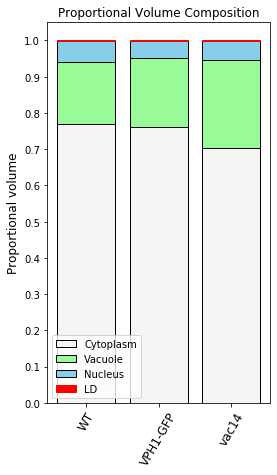

In [246]:
# stack bar plot
vol_comp_stacked = plt.figure(figsize = (4,7))
plt.bar(strains, np.array(cyto_means), color = 'whitesmoke', edgecolor = 'black')
plt.bar(strains, np.array(vac_means), bottom =  np.array(cyto_means), color = 'palegreen', edgecolor = 'black')
plt.bar(strains, np.array(nuc_means), bottom =  np.array(cyto_means)+ np.array(vac_means), color = 'skyblue', edgecolor = 'black')
plt.bar(strains, np.array(ld_means), bottom =  np.array(cyto_means)+ np.array(vac_means)+np.array(nuc_means), color = 'r', edgecolor = 'r')

plt.legend(['Cytoplasm','Vacuole','Nucleus','LD'],fontsize=10)
plt.xticks(rotation=60,fontsize=12)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Proportional volume',fontsize=12)
plt.title('Proportional Volume Composition',fontsize=12)


plt.savefig(output_dir +'stacked vol composition prop_strains2.jpg')

### Fig 4FG ###

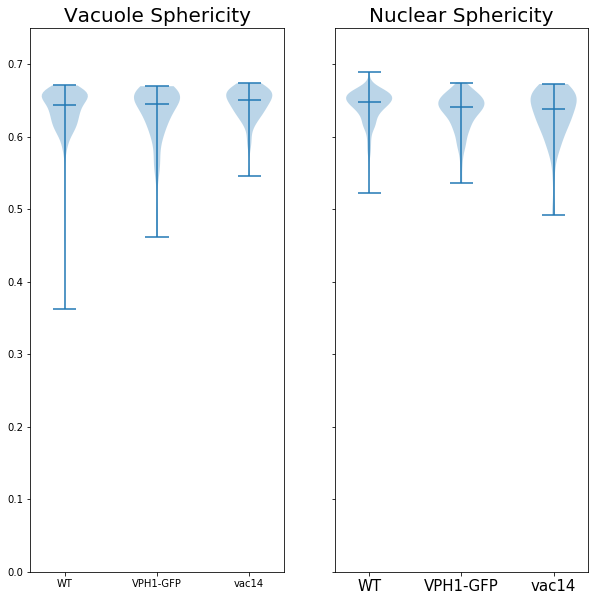

In [277]:
fig,axs = plt.subplots(1,2,squeeze=False,sharex=True,sharey=True,figsize=(10,10))
grps = ['WT','VPH1-GFP', 'vac14']
plt.xticks(ticks=[1,2,3],labels=grps,fontsize=15)
plt.ylim([0,0.75])

vac_sphr = [wt_vac['Sphericity(Pix)'],vph1_vac['Sphericity(Pix)'],vac14_vac['Sphericity(Pix)']]
axs[0,0].violinplot(vac_sphr,showmedians=True)
axs[0,0].set_title('Vacuole Sphericity',fontsize=20)
# axs[0,1].set_ylabel('Vacuole Sphericity',fontsize=15)

nuc_sphr = [wt_nuc['Sphericity(Pix)'],vph1_nuc['Sphericity(Pix)'], vac14_nuc['Sphericity(Pix)']]
axs[0,1].violinplot(nuc_sphr,showmedians=True)
# axs[0,0].set_ylabel('Nuclear Sphericity',fontsize=15)
axs[0,1].set_title('Nuclear Sphericity',fontsize=20)

plt.savefig(output_dir + 'Vac Nuc Sphericity')

In [212]:
# sphericity stats
Excelwriter = pd.ExcelWriter("Sphericity summary stats.xlsx", engine = 'xlsxwriter')

vac_sphr_stats = calcstats(vac_sphr)
# vac_sphr_stats.to_excel(Excelwriter, sheet_name = 'Vacuole', index=False)

nuc_sphr_stats = calcstats(nuc_sphr)
# nuc_sphr_stats.to_excel(Excelwriter, sheet_name = 'Nucleus', index=False)

nuc_sphr_stats
# Excelwriter.save()



,Sphericity(Pix),Sphericity(Pix),Sphericity(Pix)
count,287,138,65
mean,0.641899,0.633826,0.630169
std,0.0229496,0.0267055,0.0371095
min,0.522,0.536,0.492
25%,0.6325,0.62075,0.618
50%,0.648,0.6415,0.639
75%,0.658,0.651,0.657
max,0.689,0.675,0.673
Shapiro-Wilk statistic,0.876563,0.902642,0.84194
Shapiro-Wilk p-value,1.91938e-14,5.25019e-08,8.06393e-07


In [213]:
# sphericity significance testing

sphr_tests = {'Vacuole - WT vs vph1-GFP':(vac_sphr[0], vac_sphr[1]), 'Vacuole - vph1-GFP vs vac14':(vac_sphr[1],vac_sphr[2]),
            'Nucleus - WT vs vph1-GFP':(nuc_sphr[0], nuc_sphr[1]), 'Nucleus - vph1-GFP vs vac14':(nuc_sphr[1],nuc_sphr[2])}

sphr_sigstats = sigtest(sphr_tests)
sphr_sigstats

# sphr_sigstats.to_excel(Excelwriter, sheet_name = 'Significance Tests', index=False)
# Excelwriter.save()


,Vacuole - WT vs vph1-GFP,Vacuole - vph1-GFP vs vac14,Nucleus - WT vs vph1-GFP,Nucleus - vph1-GFP vs vac14
Mann-Whitney U-test statistic,19675,3679.5,15809.5,4450.5
p-value,0.457176,0.0196018,0.000378393,0.465302
Significant (p<0.05),NS,S,S,NS
